In [1]:
import pandas as pd

In [2]:
!conda install -c quantopian ta-lib --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - ta-lib


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.4.5.1-py36h~ --> pkgs/main::certifi-2020.4.5.1-py36_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
lng = pd.read_csv("LNG.csv", index_col=0)

In [4]:
spy = pd.read_csv("SPY.csv", index_col=0)

In [5]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
1994-04-04,72.0,0.0
1994-04-05,108.0,0.0
1994-04-06,108.0,0.0
1994-04-07,108.0,0.0
1994-04-08,108.0,0.0


In [6]:
lng_df = lng['2016-04-15':'2018-04-10']

In [7]:
lng_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0
...,...,...
2018-04-04,54.30,1816771.0
2018-04-05,56.21,2533635.0
2018-04-06,54.36,1754446.0


In [8]:
spy_df = spy['2016-04-15':'2018-04-10']

In [9]:
spy_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,199.760673,75761600.0
2016-04-18,201.164330,75277700.0
2016-04-19,201.798846,88316100.0
2016-04-20,201.991139,81100300.0
2016-04-21,200.904747,85695000.0
...,...,...
2018-04-04,263.560000,123574054.0
2018-04-05,265.640000,80993290.0
2018-04-06,259.720000,179483634.0


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt

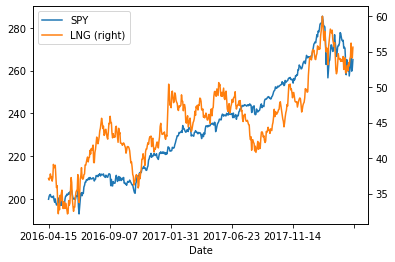

In [12]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

In [13]:
plt.clf()  # clear the plot space

<Figure size 432x288 with 0 Axes>

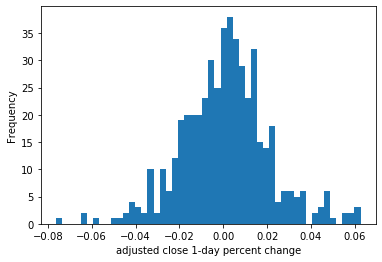

In [14]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [15]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [16]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct
Date,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN
2016-04-18,36.90,3445852.0,36.75,NaN,NaN
2016-04-19,37.12,3748050.0,37.25,NaN,NaN
2016-04-20,37.77,2470384.0,39.11,NaN,NaN
2016-04-21,37.21,2043988.0,38.62,NaN,NaN
...,...,...,...,...,...
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025


In [17]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


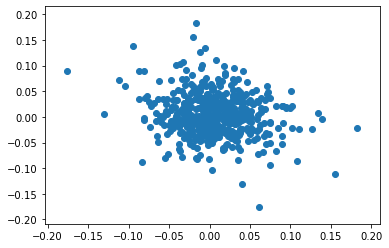

In [18]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

In [19]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

In [20]:
import talib


In [21]:
# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Drop all na values
lng_df = lng_df.dropna()

In [23]:
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct']

In [24]:
# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]

In [25]:
# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.047183  0.096373 -0.068888   
5d_close_pct                   -0.047183      1.000000 -0.827699  0.683973   
ma14                            0.096373     -0.827699  1.000000 -0.877566   
rsi14                          -0.068888      0.683973 -0.877566  1.000000   
ma30                            0.102744     -0.609573  0.848778 -0.964795   
rsi30                          -0.106279      0.518748 -0.713427  0.935711   
ma50                            0.113444     -0.475081  0.692689 -0.916540   
rsi50                          -0.138946      0.426045 -0.601849  0.845788   
ma200                           0.230860     -0.220690  0.346457 -0.551087   
rsi200                         -0.221029      0.284021 -0.416221  0.639057   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.102744 -0.106279  0.113444 -0.138946  0.23086

In [26]:
import seaborn as sns

/home/jupyterlab/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


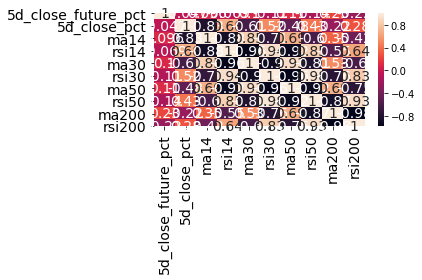

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

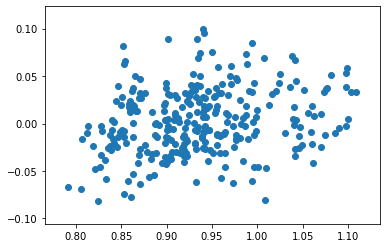

In [28]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['ma200'], lng_df['5d_close_future_pct'])
plt.show()

In [29]:
conda install -c conda-forge statsmodels

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - statsmodels


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi              pkgs/main::certifi-2020.4.5.1-py36_0 --> conda-forge::certifi-2020.4.5.1-py36h9f0ad1d_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np

In [31]:
#pip uninstall statsmodels -y

In [32]:
pip install statsmodels==0.10.0rc2 --pre --user

Note: you may need to restart the kernel to use updated packages.


In [33]:
#Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

In [34]:
import statsmodels.api as sm

In [35]:
# Add a constant to the features
linear_features = sm.add_constant(features)

In [36]:
# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 *targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 10) (250, 10) (45, 10)


In [37]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.273
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     10.01
Date:                 Tue, 26 May 2020   Prob (F-statistic):           4.92e-13
Time:                         21:53:05   Log-Likelihood:                 536.49
No. Observations:                  250   AIC:                            -1053.
Df Residuals:                      240   BIC:                            -1018.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8197      1.169    

In [38]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

const           1.764767e-08
5d_close_pct    4.075985e-01
ma14            1.317652e-01
rsi14           4.119023e-10
ma30            2.870964e-01
rsi30           1.315491e-11
ma50            6.542888e-08
rsi50           1.598367e-12
ma200           1.087610e-02
rsi200          2.559536e-11
dtype: float64


In [39]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

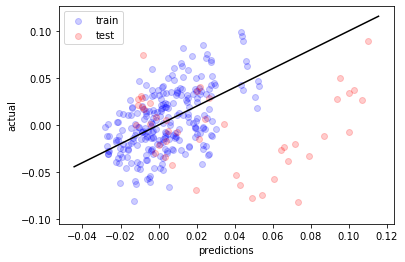

In [40]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()


In [41]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
lng_df['Adj_Volume_1d_change'] = lng_df['Adj_Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df['Adj_Volume_1d_change'].values,
                        timeperiod=5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


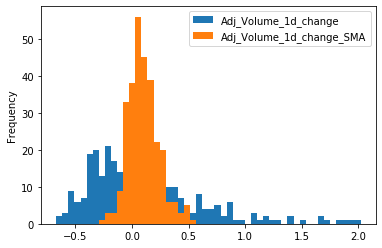

In [42]:
# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [43]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377,NaN,NaN
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663,-0.040125,NaN
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475,0.501912,NaN
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479,0.349442,NaN
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442,-0.497152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487,-0.048011,0.145910
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361,-0.332842,-0.071550
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707,1.166646,0.180670


In [44]:
lng_df.index = pd.to_datetime(lng_df.index)

In [45]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377,NaN,NaN
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663,-0.040125,NaN
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475,0.501912,NaN
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479,0.349442,NaN
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442,-0.497152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487,-0.048011,0.145910
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361,-0.332842,-0.071550
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707,1.166646,0.180670


In [46]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(lng_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)


In [47]:
# Set the index as the original DataFrame index for merging
days_of_week.index = lng_df.index

In [48]:
# Join the dataframe with the days of week DataFrame
lng_df = pd.concat([lng_df, days_of_week], axis=1)

In [49]:
# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
lng_df.dropna(inplace=True)  # drop missing values in-place
print(lng_df.head())

            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2017-02-07      47.81   2522644.0            47.88             0.001464   
2017-02-08      48.01   1521339.0            47.69            -0.006665   
2017-02-09      49.19   1717838.0            46.84            -0.047774   
2017-02-10      48.93   1747989.0            46.71            -0.045371   
2017-02-13      48.14   2321977.0            47.36            -0.016203   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2017-02-07      0.003358  0.985448  58.654992  0.939476  58.817869  0.911801   
2017-02-08      0.019321  0.989333  59.351015  0.940047  59.182360  0.911289   
2017-02-09     -0.002838  0.974211  63.278848  0.922383  61.274321  0.893214   
2017-02-10     -0.010115  0.987957  61.860468  0.931821  60.566775  0.9020

In [50]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

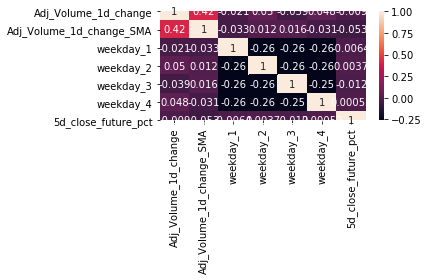

In [51]:
# Plot the correlations between the new features and the targets
sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

In [54]:
# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999950331816782
-1.370945285953726


In [56]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)
    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.31221074754988065
-0.34425820543875796 

max_depth= 5
0.5300236519892909
-1.4252156719841511 

max_depth= 10
0.896998296863188
-1.5115907913257027 

